![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

Utilize your unsupervised learning skills to clusters in the penguins dataset!

- Import, investigate and pre-process the "penguins.csv" dataset.
- Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
# Info of the df
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [3]:
# Checking for null values
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [4]:
# Step 2 - Perform preprocessing steps on the dataset to create dummy variables
# Convert categorical variables into dummy/indicator variables
penguins_df = pd.get_dummies(penguins_df, dtype='int') # the output will be 0/1 instead of True/False
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [5]:
# Step 3 - Perform preprocessing steps on the dataset - standarizing/scaling
# Scaling variables (also called standardizing) is recommended before performing a clustering algorithm since this 
# can increase the performance greatly
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)

penguins_preprocessed = pd.DataFrame(data = X, columns = penguins_df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


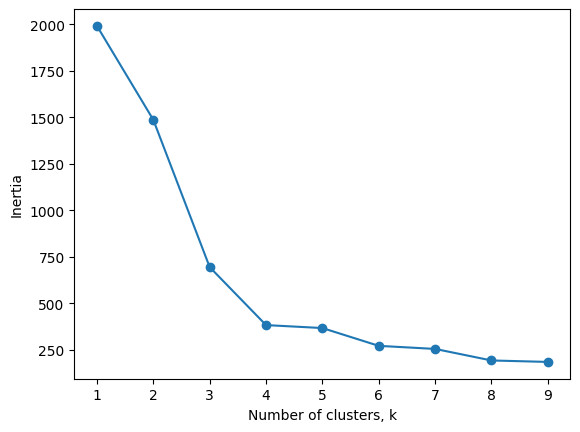

In [6]:
# Step 4 - Detect the optimal number of clusters for k-means clustering
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters = k, random_state=42).fit(penguins_preprocessed)
    
    # Fit model to samples
    # kmeans.fit(penguins_preprocessed)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()
n_clusters = 4

In [7]:
# Step 5 - Run the k-means clustering algorithm
# with the optimal number of clusters 
kmeans = KMeans(n_clusters=4, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

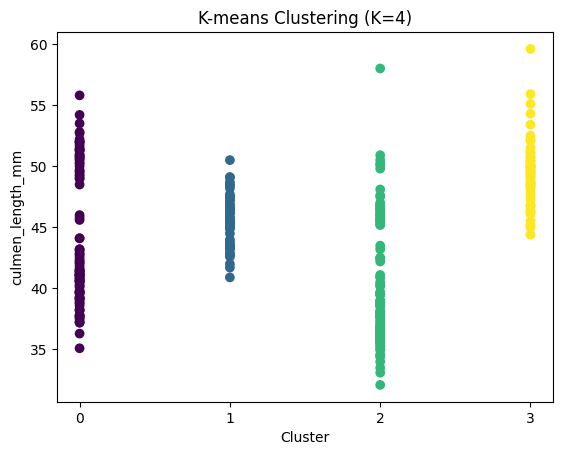

In [8]:
# Visualizing the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [9]:
# Fial step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
